In [1]:
from google.colab import drive
drive.mount('/content/drive')


!pip install deepchem rdkit matplotlib networkx

import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from deepchem.feat import MolGraphConvFeaturizer
from deepchem.feat import CircularFingerprint
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from deepchem.feat import ConvMolFeaturizer
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
import deepchem as dc
#from drive.MyDrive.code.methods import *
from drive.MyDrive.code.methods_fingerprints import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


In [2]:
smiles_tr,smiles_test, logSweeter_tr, logSweeter_test, families_tr, families_test = load_data_remove("/content/drive/MyDrive/code/SweetnersDB.xlsx")

Index(['Name', 'logSw', 'Chemical family', 'Dataset', 'Smiles'], dtype='object')


In [3]:
X_tr,X_test,scaler_X = prepare_fingerprint(smiles_tr,smiles_test)
y_tr,y_test,scaler_y = prepare_targets(logSweeter_tr,logSweeter_test)

[10:37:09] DEPRECATION WARNING: please use MorganGenerator
[10:37:09] DEPRECATION WARNING: please use MorganGenerator
[10:37:09] DEPRECATION WARNING: please use MorganGenerator
[10:37:09] DEPRECATION WARNING: please use MorganGenerator
[10:37:09] DEPRECATION WARNING: please use MorganGenerator
[10:37:09] DEPRECATION WARNING: please use MorganGenerator
[10:37:09] DEPRECATION WARNING: please use MorganGenerator
[10:37:09] DEPRECATION WARNING: please use MorganGenerator
[10:37:09] DEPRECATION WARNING: please use MorganGenerator
[10:37:09] DEPRECATION WARNING: please use MorganGenerator
[10:37:09] DEPRECATION WARNING: please use MorganGenerator
[10:37:09] DEPRECATION WARNING: please use MorganGenerator
[10:37:09] DEPRECATION WARNING: please use MorganGenerator
[10:37:09] DEPRECATION WARNING: please use MorganGenerator
[10:37:09] DEPRECATION WARNING: please use MorganGenerator
[10:37:09] DEPRECATION WARNING: please use MorganGenerator
[10:37:09] DEPRECATION WARNING: please use MorganGenerat

# Scoring regression logistique

In [4]:
sweet_thr = 0
ytr = pd.DataFrame(y_tr,columns=['label'])
target_tr =  ytr['label'].apply(lambda x: 0 if x <= sweet_thr else 1)
ytest = pd.DataFrame(y_test,columns=['label'])
target_test =  ytest['label'].apply(lambda x: 0 if x <= sweet_thr else 1)

model = LogisticRegression(max_iter=10000, random_state=42)
param_grid = {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear', 'saga'],
        'l1_ratio': [0, 0.5, 1]  # Utilisé uniquement si penalty est 'elasticnet'
    }



In [8]:

# Utiliser un context manager pour définir le backend
with parallel_backend(backend):
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1, verbose=2) ## n_jobs = -1?

  grid_search.fit(X_tr, target_tr)





Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END .......C=0.01, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=0.01, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=0.01, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=0.01, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=0.01, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END ........C=0.01, l1_ratio=0, penalty=l1, solver=saga; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=0, penalty=l1, solver=saga; total time=   0.7s
[CV] END ........C=0.01, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s
[CV] END ........C=0.01, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=0.01, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=0.01, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=0.01, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=0.01, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=0.01, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ...C=0.01, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END ........C=0.01, l1_ratio=0, penalty=l2, solver=saga; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=0, penalty=l2, solver=saga; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=0, penalty=l2, solver=saga; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=0, penalty=l2, solver=saga; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=0, penalty=l2, solver=saga; total time=   0.9s
[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.8

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.01, l1_ratio=0, penalty=none, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.01, l1_ratio=0, penalty=none, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.01, l1_ratio=0, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.01, l1_ratio=0, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.01, l1_ratio=0, penalty=none, solver=lbfgs; total time=   1.1s
[CV] END .C=0.01, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.01, l1_ratio=0, penalty=none, solver=saga; total time=  15.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.01, l1_ratio=0, penalty=none, solver=saga; total time=  23.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.01, l1_ratio=0, penalty=none, solver=saga; total time=  25.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.01, l1_ratio=0, penalty=none, solver=saga; total time=  14.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.01, l1_ratio=0, penalty=none, solver=saga; total time=  19.2s
[CV] END .....C=0.01, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.01, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.01, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.01, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.01, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .C=0.01, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END ......C=0.01, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s
[CV] END ......C=0.01, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.01, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=0.01, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s
[CV] END ......C=0.01, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=0.01, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=0.01, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=0.01, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=0.01, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=0.01, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END .C=0.01, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END ......C=0.01, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=0.01, l1_ratio=0.5, penalty=l2, solver=saga; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=0.01, l1_ratio=0.5, penalty=l2, solver=saga; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=0.01, l1_ratio=0.5, penalty=l2, solver=saga; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=0.01, l1_ratio=0.5, penalty=l2, solver=saga; total time=   1.5s
[CV] END C=0.01, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, penalty=elasticnet, solver=s

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=0.01, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=0.01, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=0.01, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=0.01, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=0.01, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   1.1s
[CV] END C=0.01, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=0.01, l1_ratio=0.5, penalty=none, solver=saga; total time=  12.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=0.01, l1_ratio=0.5, penalty=none, solver=saga; total time=  24.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=0.01, l1_ratio=0.5, penalty=none, solver=saga; total time=  25.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=0.01, l1_ratio=0.5, penalty=none, solver=saga; total time=  13.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=0.01, l1_ratio=0.5, penalty=none, solver=saga; total time=  20.8s
[CV] END .......C=0.01, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=0.01, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=0.01, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=0.01, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=0.01, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END ........C=0.01, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s
[CV] END ........C=0.01, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s
[CV] END ........C=0.01, l1_ratio=1, penalty=l1, solver=saga; total time=   0.1s
[CV] END ........C=0.01, l1_ratio=1, penalty=l1, solver=saga; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=0.01, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=0.01, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=0.01, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=0.01, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=0.01, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ...C=0.01, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END ........C=0.01, l1_ratio=1, penalty=l2, solver=saga; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=1, penalty=l2, solver=saga; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=1, penalty=l2, solver=saga; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=1, penalty=l2, solver=saga; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=1, penalty=l2, solver=saga; total time=   0.9s
[CV] END C=0.01, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.01, l1_ratio=1, penalty=none, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.01, l1_ratio=1, penalty=none, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.01, l1_ratio=1, penalty=none, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.01, l1_ratio=1, penalty=none, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.01, l1_ratio=1, penalty=none, solver=lbfgs; total time=   1.0s
[CV] END .C=0.01, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.01, l1_ratio=1, penalty=none, solver=saga; total time=   7.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.01, l1_ratio=1, penalty=none, solver=saga; total time=  25.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.01, l1_ratio=1, penalty=none, solver=saga; total time=  22.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.01, l1_ratio=1, penalty=none, solver=saga; total time=  14.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.01, l1_ratio=1, penalty=none, solver=saga; total time=  19.0s
[CV] END ........C=0.1, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=0.1, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=0.1, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=0.1, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=0.1, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END .........C=0.1, l1_ratio=0, penalty=l1, solver=saga; total time=  10.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=0, penalty=l1, solver=saga; total time=   8.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=0, penalty=l1, solver=saga; total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=0, penalty=l1, solver=saga; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=0, penalty=l1, solver=saga; total time=  16.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.1, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.1, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.1, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.1, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.1, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ....C=0.1, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END ....C=0.1, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=0, penalty=l2, solver=saga; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=0, penalty=l2, solver=saga; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=0, penalty=l2, solver=saga; total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=0, penalty=l2, solver=saga; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=0, penalty=l2, solver=saga; total time=   1.9s
[CV] END C=0.1, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END .C=0.1, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   1.6s
[CV] END

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.1, l1_ratio=0, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.1, l1_ratio=0, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.1, l1_ratio=0, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.1, l1_ratio=0, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.1, l1_ratio=0, penalty=none, solver=lbfgs; total time=   1.0s
[CV] END ..C=0.1, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=0, penalty=none, solver=saga; total time=  11.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=0, penalty=none, solver=saga; total time=  39.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=0, penalty=none, solver=saga; total time=  36.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=0, penalty=none, solver=saga; total time=  24.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=0, penalty=none, solver=saga; total time=  19.7s
[CV] END ......C=0.1, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.1, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END .......C=0.1, l1_ratio=0.5, penalty=l1, solver=saga; total time=   8.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=0.5, penalty=l1, solver=saga; total time=  10.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=0.5, penalty=l1, solver=saga; total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=0.5, penalty=l1, solver=saga; total time=   8.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=0.5, penalty=l1, solver=saga; total time=  16.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=0.1, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=0.1, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=0.1, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=0.1, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=0.1, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ..C=0.1, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=0.1, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END .......C=0.1, l1_ratio=0.5, penalty=l2, solver=saga; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=0.5, penalty=l2, solver=saga; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=0.5, penalty=l2, solver=saga; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=0.5, penalty=l2, solver=saga; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=0.5, penalty=l2, solver=saga; total time=   1.9s
[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=0.1, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=0.1, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=0.1, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=0.1, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=0.1, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   1.0s
[CV] END C=0.1, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.1, l1_ratio=0.5, penalty=none, solver=saga; total time=  10.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.1, l1_ratio=0.5, penalty=none, solver=saga; total time=  22.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.1, l1_ratio=0.5, penalty=none, solver=saga; total time=  24.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.1, l1_ratio=0.5, penalty=none, solver=saga; total time=  12.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.1, l1_ratio=0.5, penalty=none, solver=saga; total time=  22.3s
[CV] END ........C=0.1, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=0.1, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=0.1, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=0.1, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=0.1, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END .........C=0.1, l1_ratio=1, penalty=l1, solver=saga; total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=1, penalty=l1, solver=saga; total time=  11.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=1, penalty=l1, solver=saga; total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=1, penalty=l1, solver=saga; total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=1, penalty=l1, solver=saga; total time=  16.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.1, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.1, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.1, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.1, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.1, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ....C=0.1, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END .........C=0.1, l1_ratio=1, penalty=l2, solver=saga; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=1, penalty=l2, solver=saga; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=1, penalty=l2, solver=saga; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=1, penalty=l2, solver=saga; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=1, penalty=l2, solver=saga; total time=   2.8s
[CV] END C=0.1, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END .C=0.1, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   8.8s
[CV] END

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.1, l1_ratio=1, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.1, l1_ratio=1, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.1, l1_ratio=1, penalty=none, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.1, l1_ratio=1, penalty=none, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.1, l1_ratio=1, penalty=none, solver=lbfgs; total time=   1.1s
[CV] END ..C=0.1, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=1, penalty=none, solver=saga; total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=1, penalty=none, solver=saga; total time=  25.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=1, penalty=none, solver=saga; total time=  23.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=1, penalty=none, solver=saga; total time=  14.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=1, penalty=none, solver=saga; total time=  19.0s
[CV] END ..........C=1, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=1, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=1, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=1, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=1, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END ...........C=1, l1_ratio=0, penalty=l1, solver=saga; total time=  12.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=0, penalty=l1, solver=saga; total time=  14.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=0, penalty=l1, solver=saga; total time=  10.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=0, penalty=l1, solver=saga; total time=  21.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=0, penalty=l1, solver=saga; total time=  13.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=1, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=1, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=1, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=1, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=1, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END ......C=1, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ......C=1, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END ......C=1, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ......C=1, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ......C=1, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=0, penalty=l2, solver=saga; total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=0, penalty=l2, solver=saga; total time=   9.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=0, penalty=l2, solver=saga; total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=0, penalty=l2, solver=saga; total time=   9.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=0, penalty=l2, solver=saga; total time=   7.3s
[CV] END ..C=1, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=1, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=1, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=1, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=1, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   5.9s
[CV] END ...C=1, l

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ........C=1, l1_ratio=0, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ........C=1, l1_ratio=0, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ........C=1, l1_ratio=0, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ........C=1, l1_ratio=0, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ........C=1, l1_ratio=0, penalty=none, solver=lbfgs; total time=   1.0s
[CV] END ....C=1, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .........C=1, l1_ratio=0, penalty=none, solver=saga; total time=   9.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .........C=1, l1_ratio=0, penalty=none, solver=saga; total time=  22.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .........C=1, l1_ratio=0, penalty=none, solver=saga; total time=  23.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .........C=1, l1_ratio=0, penalty=none, solver=saga; total time=  13.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .........C=1, l1_ratio=0, penalty=none, solver=saga; total time=  20.2s
[CV] END ........C=1, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END ....C=1, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ....C=1, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ....C=1, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.5, penalty=l1, solver=saga; total time=  11.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.5, penalty=l1, solver=saga; total time=  14.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.5, penalty=l1, solver=saga; total time=  13.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.5, penalty=l1, solver=saga; total time=  19.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.5, penalty=l1, solver=saga; total time=  14.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END ....C=1, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END ....C=1, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.5, penalty=l2, solver=saga; total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.5, penalty=l2, solver=saga; total time=   7.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.5, penalty=l2, solver=saga; total time=  10.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.5, penalty=l2, solver=saga; total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.5, penalty=l2, solver=saga; total time=  10.0s
[CV] END C=1, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END .C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   7.7s
[CV] END

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ......C=1, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ......C=1, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ......C=1, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ......C=1, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ......C=1, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   1.0s
[CV] END ..C=1, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .......C=1, l1_ratio=0.5, penalty=none, solver=saga; total time=  10.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .......C=1, l1_ratio=0.5, penalty=none, solver=saga; total time=  22.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .......C=1, l1_ratio=0.5, penalty=none, solver=saga; total time=  26.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .......C=1, l1_ratio=0.5, penalty=none, solver=saga; total time=  13.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .......C=1, l1_ratio=0.5, penalty=none, solver=saga; total time=  20.7s
[CV] END ..........C=1, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=1, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=1, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=1, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=1, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END ...........C=1, l1_ratio=1, penalty=l1, solver=saga; total time=   9.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=1, penalty=l1, solver=saga; total time=  14.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=1, penalty=l1, solver=saga; total time=  13.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=1, penalty=l1, solver=saga; total time=  19.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=1, penalty=l1, solver=saga; total time=  14.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=1, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=1, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=1, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=1, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=1, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END ......C=1, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


[CV] END ......C=1, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ......C=1, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ......C=1, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END ......C=1, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=1, penalty=l2, solver=saga; total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=1, penalty=l2, solver=saga; total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=1, penalty=l2, solver=saga; total time=  10.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=1, penalty=l2, solver=saga; total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=1, penalty=l2, solver=saga; total time=  10.1s
[CV] END ..C=1, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=1, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=1, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=1, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=1, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=1, penalty=elasticnet, solver=saga; total time=  10.5s
[CV] END ...C=1, l

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ........C=1, l1_ratio=1, penalty=none, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ........C=1, l1_ratio=1, penalty=none, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ........C=1, l1_ratio=1, penalty=none, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ........C=1, l1_ratio=1, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ........C=1, l1_ratio=1, penalty=none, solver=lbfgs; total time=   1.1s
[CV] END ....C=1, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .........C=1, l1_ratio=1, penalty=none, solver=saga; total time=   9.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .........C=1, l1_ratio=1, penalty=none, solver=saga; total time=  22.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .........C=1, l1_ratio=1, penalty=none, solver=saga; total time=  24.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .........C=1, l1_ratio=1, penalty=none, solver=saga; total time=  14.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .........C=1, l1_ratio=1, penalty=none, solver=saga; total time=  19.1s
[CV] END .........C=10, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=10, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=10, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=10, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=10, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END ..........C=10, l1_ratio=0, penalty=l1, solver=saga; total time=  13.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=0, penalty=l1, solver=saga; total time=  25.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=0, penalty=l1, solver=saga; total time=  28.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=0, penalty=l1, solver=saga; total time=  16.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=0, penalty=l1, solver=saga; total time=  22.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=10, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=10, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=10, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=10, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=10, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END .....C=10, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .....C=10, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END .....C=10, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .....C=10, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .....C=10, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=0, penalty=l2, solver=saga; total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=0, penalty=l2, solver=saga; total time=  20.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=0, penalty=l2, solver=saga; total time=  21.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=0, penalty=l2, solver=saga; total time=  11.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=0, penalty=l2, solver=saga; total time=  16.8s
[CV] END .C=10, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=10, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=10, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=10, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=10, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..C=10, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   8.3s
[CV] END ..C=

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=10, l1_ratio=0, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=10, l1_ratio=0, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=10, l1_ratio=0, penalty=none, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=10, l1_ratio=0, penalty=none, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=10, l1_ratio=0, penalty=none, solver=lbfgs; total time=   1.1s
[CV] END ...C=10, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ........C=10, l1_ratio=0, penalty=none, solver=saga; total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ........C=10, l1_ratio=0, penalty=none, solver=saga; total time=  25.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ........C=10, l1_ratio=0, penalty=none, solver=saga; total time=  23.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ........C=10, l1_ratio=0, penalty=none, solver=saga; total time=  14.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ........C=10, l1_ratio=0, penalty=none, solver=saga; total time=  19.3s
[CV] END .......C=10, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END ........C=10, l1_ratio=0.5, penalty=l1, solver=saga; total time=  13.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.5, penalty=l1, solver=saga; total time=  27.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.5, penalty=l1, solver=saga; total time=  26.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.5, penalty=l1, solver=saga; total time=  16.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.5, penalty=l1, solver=saga; total time=  24.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END ...C=10, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END ...C=10, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.5, penalty=l2, solver=saga; total time=   8.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.5, penalty=l2, solver=saga; total time=  20.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.5, penalty=l2, solver=saga; total time=  20.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.5, penalty=l2, solver=saga; total time=  13.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.5, penalty=l2, solver=saga; total time=  16.8s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=  11.8

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=10, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=10, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=10, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=10, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=10, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   1.1s
[CV] END .C=10, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=10, l1_ratio=0.5, penalty=none, solver=saga; total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=10, l1_ratio=0.5, penalty=none, solver=saga; total time=  24.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=10, l1_ratio=0.5, penalty=none, solver=saga; total time=  23.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=10, l1_ratio=0.5, penalty=none, solver=saga; total time=  14.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=10, l1_ratio=0.5, penalty=none, solver=saga; total time=  19.1s
[CV] END .........C=10, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=10, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=10, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=10, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=10, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END ..........C=10, l1_ratio=1, penalty=l1, solver=saga; total time=  13.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=1, penalty=l1, solver=saga; total time=  27.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=1, penalty=l1, solver=saga; total time=  29.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=1, penalty=l1, solver=saga; total time=  16.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=1, penalty=l1, solver=saga; total time=  24.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=10, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=10, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=10, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=10, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=10, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END .....C=10, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .....C=10, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END .....C=10, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .....C=10, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .....C=10, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=1, penalty=l2, solver=saga; total time=   8.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=1, penalty=l2, solver=saga; total time=  20.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=1, penalty=l2, solver=saga; total time=  20.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=1, penalty=l2, solver=saga; total time=  13.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=1, penalty=l2, solver=saga; total time=  17.2s
[CV] END .C=10, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=10, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=10, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=10, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=10, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..C=10, l1_ratio=1, penalty=elasticnet, solver=saga; total time=  13.5s
[CV] END ..C=

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=10, l1_ratio=1, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=10, l1_ratio=1, penalty=none, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=10, l1_ratio=1, penalty=none, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=10, l1_ratio=1, penalty=none, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=10, l1_ratio=1, penalty=none, solver=lbfgs; total time=   1.0s
[CV] END ...C=10, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ........C=10, l1_ratio=1, penalty=none, solver=saga; total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ........C=10, l1_ratio=1, penalty=none, solver=saga; total time=  24.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ........C=10, l1_ratio=1, penalty=none, solver=saga; total time=  22.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ........C=10, l1_ratio=1, penalty=none, solver=saga; total time=  14.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ........C=10, l1_ratio=1, penalty=none, solver=saga; total time=  19.1s
[CV] END ........C=100, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=100, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=100, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=100, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=100, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=100, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=100, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=100, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=100, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=100, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END .........C=100, l1_ratio=0, penalty=l1, solver=saga; total time=  14.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=100, l1_ratio=0, penalty=l1, solver=saga; total time=  32.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=100, l1_ratio=0, penalty=l1, solver=saga; total time=  33.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=100, l1_ratio=0, penalty=l1, solver=saga; total time=  19.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=100, l1_ratio=0, penalty=l1, solver=saga; total time=  28.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=100, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=100, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=100, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=100, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=100, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END ....C=100, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=100, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END ....C=100, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=100, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=100, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=100, l1_ratio=0, penalty=l2, solver=saga; total time=  10.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=100, l1_ratio=0, penalty=l2, solver=saga; total time=  21.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=100, l1_ratio=0, penalty=l2, solver=saga; total time=  24.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=100, l1_ratio=0, penalty=l2, solver=saga; total time=  13.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=100, l1_ratio=0, penalty=l2, solver=saga; total time=  20.6s
[CV] END C=100, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END .C=100, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   8.8s
[CV] END

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=100, l1_ratio=0, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=100, l1_ratio=0, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=100, l1_ratio=0, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=100, l1_ratio=0, penalty=none, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=100, l1_ratio=0, penalty=none, solver=lbfgs; total time=   1.1s
[CV] END ..C=100, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=100, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=100, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=100, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=100, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=100, l1_ratio=0, penalty=none, solver=saga; total time=  10.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=100, l1_ratio=0, penalty=none, solver=saga; total time=  22.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=100, l1_ratio=0, penalty=none, solver=saga; total time=  25.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=100, l1_ratio=0, penalty=none, solver=saga; total time=  13.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=100, l1_ratio=0, penalty=none, solver=saga; total time=  19.9s
[CV] END ......C=100, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=100, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=100, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=100, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=100, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=100, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END .......C=100, l1_ratio=0.5, penalty=l1, solver=saga; total time=  12.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=100, l1_ratio=0.5, penalty=l1, solver=saga; total time=  31.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=100, l1_ratio=0.5, penalty=l1, solver=saga; total time=  32.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=100, l1_ratio=0.5, penalty=l1, solver=saga; total time=  21.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=100, l1_ratio=0.5, penalty=l1, solver=saga; total time=  25.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=100, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=100, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=100, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=100, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=100, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   1.2s
[CV] END ..C=100, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=100, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END ..C=100, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=100, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=100, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=100, l1_ratio=0.5, penalty=l2, solver=saga; total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=100, l1_ratio=0.5, penalty=l2, solver=saga; total time=  24.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=100, l1_ratio=0.5, penalty=l2, solver=saga; total time=  22.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=100, l1_ratio=0.5, penalty=l2, solver=saga; total time=  14.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=100, l1_ratio=0.5, penalty=l2, solver=saga; total time=  18.7s
[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga; total 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=100, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=100, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=100, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=100, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=100, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   1.0s
[CV] END C=100, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=100, l1_ratio=0.5, penalty=none, solver=saga; total time=  10.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=100, l1_ratio=0.5, penalty=none, solver=saga; total time=  22.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=100, l1_ratio=0.5, penalty=none, solver=saga; total time=  24.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=100, l1_ratio=0.5, penalty=none, solver=saga; total time=  12.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=100, l1_ratio=0.5, penalty=none, solver=saga; total time=  20.6s
[CV] END ........C=100, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=100, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=100, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=100, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=100, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=100, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=100, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=100, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/d

[CV] END ....C=100, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ....C=100, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=100, l1_ratio=1, penalty=l1, solver=saga; total time=  12.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=100, l1_ratio=1, penalty=l1, solver=saga; total time=  32.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=100, l1_ratio=1, penalty=l1, solver=saga; total time=  32.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=100, l1_ratio=1, penalty=l1, solver=saga; total time=  20.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=100, l1_ratio=1, penalty=l1, solver=saga; total time=  27.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=100, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=100, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=100, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=100, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=100, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END ....C=100, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


[CV] END ....C=100, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ....C=100, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


[CV] END ....C=100, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=100, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=100, l1_ratio=1, penalty=l2, solver=saga; total time=   8.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=100, l1_ratio=1, penalty=l2, solver=saga; total time=  22.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=100, l1_ratio=1, penalty=l2, solver=saga; total time=  23.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=100, l1_ratio=1, penalty=l2, solver=saga; total time=  14.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=100, l1_ratio=1, penalty=l2, solver=saga; total time=  18.8s
[CV] END C=100, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END .C=100, l1_ratio=1, penalty=elasticnet, solver=saga; total time=  13.9s
[CV] END

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=100, l1_ratio=1, penalty=none, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=100, l1_ratio=1, penalty=none, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=100, l1_ratio=1, penalty=none, solver=lbfgs; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=100, l1_ratio=1, penalty=none, solver=lbfgs; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=100, l1_ratio=1, penalty=none, solver=lbfgs; total time=   1.1s
[CV] END ..C=100, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=100, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=100, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=100, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=100, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=100, l1_ratio=1, penalty=none, solver=saga; total time=   8.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=100, l1_ratio=1, penalty=none, solver=saga; total time=  24.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=100, l1_ratio=1, penalty=none, solver=saga; total time=  22.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=100, l1_ratio=1, penalty=none, solver=saga; total time=  14.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=100, l1_ratio=1, penalty=none, solver=saga; total time=  19.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

In [9]:
# Affichage des meilleurs paramètres et du meilleur score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Score: {grid_search.best_score_}")

# Prédiction sur l'ensemble de test avec le meilleur modèle
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best Parameters: {'C': 0.1, 'l1_ratio': 0, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-validation Score: 0.8039999999999999


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Évaluation du modèle
accuracy = accuracy_score(target_test, y_pred)
conf_matrix = confusion_matrix(target_test, y_pred)
class_report = classification_report(target_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7903225806451613
Confusion Matrix:
[[15  6]
 [ 7 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.71      0.70        21
           1       0.85      0.83      0.84        41

    accuracy                           0.79        62
   macro avg       0.77      0.77      0.77        62
weighted avg       0.79      0.79      0.79        62



# scoring arbre de décision

In [13]:
model = DecisionTreeClassifier(random_state=42)
param_grid = {
            'criterion': ['gini', 'entropy'],  # 'log_loss' peut être utilisé pour des problèmes de classification multiclasse
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['auto', 'sqrt', 'log2']
        }
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1, verbose=2)

grid_search.fit(X_tr, target_tr)



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_spli

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [15]:
# Affichage des meilleurs paramètres et du meilleur score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Score: {grid_search.best_score_}")

# Prédiction sur l'ensemble de test avec le meilleur modèle
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)



# Évaluation du modèle
accuracy = accuracy_score(target_test, y_pred)
conf_matrix = confusion_matrix(target_test, y_pred)
class_report = classification_report(target_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-validation Score: 0.776
Accuracy: 0.7419354838709677
Confusion Matrix:
[[15  6]
 [10 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.71      0.65        21
           1       0.84      0.76      0.79        41

    accuracy                           0.74        62
   macro avg       0.72      0.74      0.72        62
weighted avg       0.76      0.74      0.75        62



# scoring random forest

In [11]:
model = RandomForestClassifier(random_state=42)
param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['auto', 'sqrt', 'log2']
        }
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1, verbose=2)

grid_search.fit(X_tr, target_tr)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [12]:
 # Affichage des meilleurs paramètres et du meilleur score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Score: {grid_search.best_score_}")

# Prédiction sur l'ensemble de test avec le meilleur modèle
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)



# Évaluation du modèle
accuracy = accuracy_score(target_test, y_pred)
conf_matrix = confusion_matrix(target_test, y_pred)
class_report = classification_report(target_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validation Score: 0.8
Accuracy: 0.8709677419354839
Confusion Matrix:
[[15  6]
 [ 2 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.71      0.79        21
           1       0.87      0.95      0.91        41

    accuracy                           0.87        62
   macro avg       0.87      0.83      0.85        62
weighted avg       0.87      0.87      0.87        62



# Régression


In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'epsilon': [0.1, 0.2, 0.5]
}

In [ ]:
svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_tr, y_tr)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.1, 0.2, 0.5],
                         'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='neg_mean_squared_error')

In [ ]:
# Récupérer les résultats détaillés pour chaque combinaison de paramètres
results = pd.DataFrame(grid_search.cv_results_)

# Afficher les performances pour chaque combinaison de paramètres
print(results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']])

NameError: name 'X' is not defined

In [ ]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
best_params

{'C': 100, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Erreur quadratique moyenne (train): {mse:.4f}")
print(f"Coefficient de détermination R² (train): {r2:.4f}")

Erreur quadratique moyenne (train): 0.4764
Coefficient de détermination R² (train): 0.5747


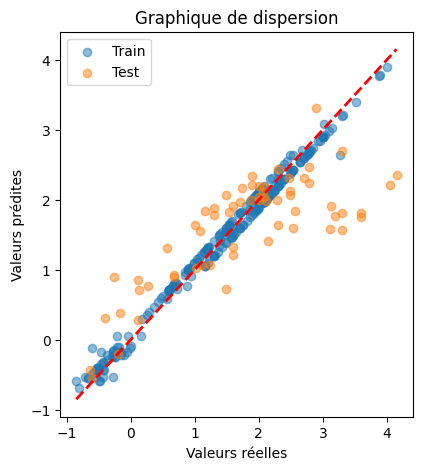

In [ ]:
# Faire des prédictions
y_pred_train = best_model.predict(X_tr)
y_pred_test = best_model.predict(X_test)

# Inverser la normalisation pour obtenir les valeurs réelles
y_pred_train = scaler_y.inverse_transform(y_pred_train.reshape(-1, 1)).ravel()
y_pred_test = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1)).ravel()
y_train = scaler_y.inverse_transform(y_tr.reshape(-1, 1)).ravel()
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

y = np.hstack((y_train,y_test))
# Visualisation : Graphique de dispersion
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Train')
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Graphique de dispersion')
plt.legend()

## représentation combinée avec la famille chimique

In [ ]:

onehot_tr,onehot_test = prepare_famille_chimique(families_tr, families_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate

input_fingerprint = Input(shape=(X_tr.shape[1],), name='fingerprint_input')
input_famille = Input(shape=(onehot_tr.shape[1],), name='famille_input')

# Combiner les entrées
concat = Concatenate()([input_fingerprint, input_famille])

# Ajouter des couches denses
dense = Dense(512, activation='relu')(concat)
output = Dense(256, activation='relu')(dense)

# Créer le modèle
model = Model(inputs=[input_fingerprint, input_famille], outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 fingerprint_input (InputLa  [(None, 1024)]               0         []                            
 yer)                                                                                             
                                                                                                  
 famille_input (InputLayer)  [(None, 9)]                  0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 1033)                 0         ['fingerprint_input[0][0]',   
                                                                     'famille_input[0][0]']       
                                                                                              

In [ ]:
predictions_tr = model.predict([X_tr, onehot_tr])

8/8 [==============================] - 0s 5ms/step


In [ ]:
predictions_test = model.predict([X_test, onehot_test])

2/2 [==============================] - 0s 12ms/step


In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'epsilon': [0.1, 0.2, 0.5]
}

In [ ]:
svr2 = SVR()
grid_search2 = GridSearchCV(svr2, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search2.fit(predictions_tr, y_tr)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.1, 0.2, 0.5],
                         'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='neg_mean_squared_error')

In [ ]:
best_model2 = grid_search2.best_estimator_
best_params2 = grid_search2.best_params_
best_score2 = grid_search2.best_score_

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred2 = best_model2.predict(predictions_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

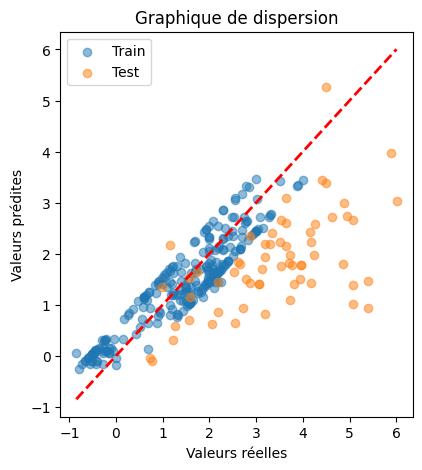

In [ ]:
# Faire des prédictions
y_pred_train = best_model2.predict(predictions_tr)
y_pred_test = best_model2.predict(predictions_test)

# Inverser la normalisation pour obtenir les valeurs réelles
y_pred_train = scaler_y.inverse_transform(y_pred_train.reshape(-1, 1)).ravel()
y_pred_test = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1)).ravel()
y_train = scaler_y.inverse_transform(y_tr.reshape(-1, 1)).ravel()
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

y = np.hstack((y_train,y_test))
# Visualisation : Graphique de dispersion
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Train')
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Graphique de dispersion')
plt.legend()